In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
using StatsBase

In [3]:
const SIZE=8

8

In [4]:
const PX=120
const PY=120

120

In [5]:
const ST = (PX, PY)

(120, 120)

In [6]:
generate_solution(;size=8) = rand(0:1, size * div(size, 2))
function represent(s; size=8)
    smat = reshape(s, (size, div(size, 2)))
    [smat reverse(smat, dims=2)]
end

represent (generic function with 1 method)

In [7]:
N = 10
solutions = zeros(Int, N, SIZE * div(SIZE, 2))
for n in 1:N
    solutions[n, 1:end] = generate_solution()
end

----

## Crossover

In [8]:
function crossover(s1, s2; size=SIZE)
    t = rand(1:(size * div(size, 2)))
    s12 = zeros(Int, size * div(size, 2))
    s12[begin:t] = s1[begin:t]
    s12[t:end] = s2[t:end]
    s12
end

crossover (generic function with 1 method)

In [9]:
sol1 = solutions[1, 1:end]
sol2 = solutions[2, 1:end]
sol12 = crossover(sol1, sol2)
h1 = heatmap(represent(sol1), aspect_ratio=1, colorbar=false, title="1", size=ST, ticks=false, xaxis=false, yaxis=false, c=:thermal)
h2 = heatmap(represent(sol2), aspect_ratio=1, colorbar=false, title="2", size=ST, ticks=false, xaxis=false, yaxis=false, c=:thermal)
h3 = heatmap(represent(sol12), aspect_ratio=1, colorbar=false, title="1 x 2", size=ST, ticks=false, xaxis=false, yaxis=false, c=:thermal)

# plot all
fig = plot(h1, h2, h3, size=(PX * 3, PY * 1), layout=(1, 3))
savefig(fig, "icons_crossover.png")
fig

----

## Mutation

In [10]:
function mutation(s; size=SIZE)
    t = rand(1:(size * div(size, 2)))
    new_s = copy(s)
    new_s[t] = (new_s[t] + 1) % 2
    new_s
end

mutation (generic function with 1 method)

In [11]:
sol1  = solutions[1, 1:end]
sol1m = mutation(sol1)
h1  = heatmap(represent(sol1), aspect_ratio=1, colorbar=false, title="1", size=ST, ticks=false, xaxis=false, yaxis=false, c=:thermal)
h1m = heatmap(represent(sol1m), aspect_ratio=1, colorbar=false, title="mutation 1", size=ST, ticks=false, xaxis=false, yaxis=false, c=:thermal)

# plot all
fig = plot(h1, h1m, size=(PX * 2, PY * 1), layout=(1, 2))
savefig(fig, "icons_mutation.png")
fig

----

## Next Generation

In [12]:
function generate_next_generation(parents; MUT_N=3, S=SIZE)
    solutions = zeros(Int, length(parents), S * div(S, 2))
    for n in 1:N
        i, j = sample(1:size(parents)[1], 2, replace=false)
        solutions[n, 1:end] = crossover(parents[i, :], parents[j, :])
    end
    for n in 1:MUT_N
        solutions[n, 1:end] = mutation(solutions[n, 1:end])
    end
    solutions
end

generate_next_generation (generic function with 1 method)

----

## Plot

In [13]:
function plot_to_file(solutions; name="icons.png", st=ST)
    h = []
    for n in 1:N
        rs = represent(solutions[n, 1:end])
        hn = heatmap(rs, aspect_ratio=1, colorbar=false, title="$n", 
            size=ST, ticks=false, xaxis=false, yaxis=false, c=:thermal)
        push!(h, hn)
    end

    # plot all
    fig = plot(h[1], h[2], h[3], h[4], h[5], h[6], h[7], h[8], h[9], h[10], layout=(2, 5),
    aspect_ratio=1, colorbar=false, size=(PX * 5, PY * 2), ticks=false, c=:thermal)
    savefig(fig, name)
    fig
end

plot_to_file (generic function with 1 method)

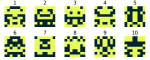

In [14]:
plot_to_file(solutions, name="icons_0.png")

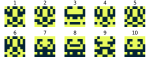

In [15]:
# 2, 3, 4, 9を選ぶ
solutions = generate_next_generation(solutions[[2, 3, 4, 9], 1:end])
plot_to_file(solutions, name="icons_1.png")

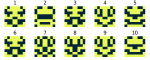

In [16]:
# 2, 3, 9を選ぶ
solutions = generate_next_generation(solutions[[2, 3, 9], 1:end])
plot_to_file(solutions, name="icons_2.png")

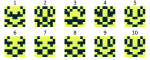

In [17]:
# 1, 4, 7, 9を選ぶ
solutions = generate_next_generation(solutions[[1, 4, 7, 9], 1:end])
plot_to_file(solutions, name="icons_3.png")

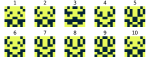

In [18]:
# 2, 8を選ぶ
solutions = generate_next_generation(solutions[[2, 8], 1:end])
plot_to_file(solutions, name="icons_4.png")